In [111]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import utils

In [132]:
METHODS = ['SKOPT','RANDOM','LSTM-MIN-RBF', 'LSTM-MIN-MATERN32']


SKOPT found : -0.355713
RANDOM found : -0.318121
LSTM-MIN-RBF found : -0.354442
LSTM-MIN-MATERN32 found : -0.376101


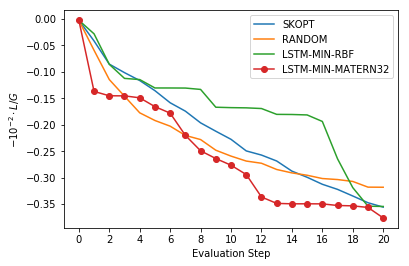

In [141]:
# METHODS = ['SKOPT-GP', 'SKOPT-GBRT', 'RANDOM', 'LSTM-MIN']

def load_data(method, normalization):
    output_dir = utils.loadConfig()['airfoil_optimization']['output_dir']
    filename = '%s/normalize-%d/%s-samples_y.npy' % (output_dir, normalization, method)
    sample_y = np.load(filename)
    return sample_y

def plot_data(normalization):
    
    for i in METHODS:
        y = utils.average_min_found_values_across_rows(load_data(i.lower(), normalization ))
        print('%s found : %f' % (i,y[-1]))
        if i == 'LSTM-MIN-MATERN32':
            plt.plot(y, label=i, marker='o')
        else:
            plt.plot(y, label=i)
    plt.xticks(range(0,21,2))
    plt.ylabel('$-10^{-2}\\cdot L/G$')
    plt.xlabel('Evaluation Step')
#     plt.legend()

plot_data(normalization=100)
plt.legend()

SKOPT found : -34.539121
RANDOM found : -30.198641
LSTM-MIN-RBF found : -29.146328
LSTM-MIN-MATERN32 found : -36.175688


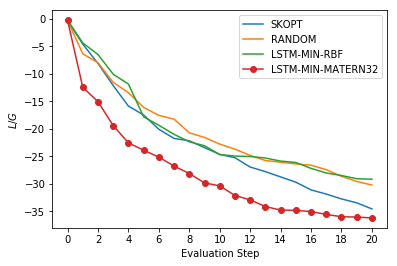

In [135]:
plot_data(normalization=1)
plt.ylabel('$L/G$')

SKOPT found : -34.539121
RANDOM found : -30.198641
LSTM-MIN-RBF found : -29.146328
LSTM-MIN-MATERN32 found : -36.175688
SKOPT found : -0.355713
RANDOM found : -0.318121
LSTM-MIN-RBF found : -0.354442
LSTM-MIN-MATERN32 found : -0.376101


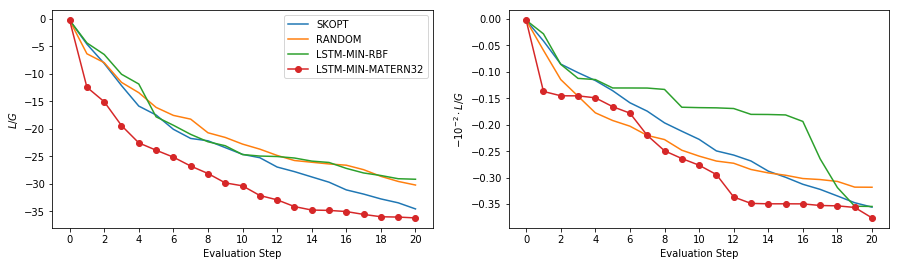

In [142]:
count = 1
plt.figure(figsize=(15,4))
for i in [1,100]:
    plt.subplot(1,2,count)
    plot_data(normalization=i)
    if i == 1:
        plt.ylabel('$L/G$')
        plt.legend()
    count = count + 1